# Lab1: Exploring NYC Flights Data: Data Manipulation and Visualization

In [150]:
# Install the tidyverse package (includes ggplot2, dplyr, tidyr, etc.)
# The 'tidyverse' package provides a suite of tools for data manipulation and visualization, like Pandas in Python.
install.packages("tidyverse")

# Install the openintro package (contains the nycflights dataset)

# The 'openintro' package contains the dataset we will use (`nycflights`).
install.packages("openintro")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# STEP 1: LOAD NECESSARY PACKAGES

In [152]:
# Load the 'tidyverse' package, which provides tools for data manipulation and visualization.
# This includes popular packages like 'ggplot2', 'dplyr', and 'tidyr'.
library(tidyverse)

# Load the 'openintro' package, which contains the 'nycflights' dataset.
# This dataset contains information about flights departing from NYC airports in 2013.
library(openintro)

# STEP 2: LOAD THE DATASET

In [162]:
# Load the 'nycflights' dataset into the R environment.
# This dataset contains information about flights departing from NYC airports in 2013.
data(nycflights)
tail(nycflights)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,28,706,36,909,22,EV,N13914,4419,EWR,IND,105,645,7,6
2013,10,8,752,-8,921,-28,9E,N8505Q,3611,JFK,PIT,63,340,7,52
2013,7,7,812,-3,1043,8,DL,N6713Y,1429,JFK,LAS,286,2248,8,12
2013,9,3,1057,-1,1319,-19,UA,N77871,1545,EWR,IAH,180,1400,10,57
2013,10,15,844,56,1045,60,B6,N258JB,1273,JFK,CHS,93,636,8,44
2013,3,28,1813,-3,1942,-23,UA,N36272,1053,EWR,CLE,59,404,18,13


In [164]:
# View the names of all variables (columns) in the dataset.
# This helps us understand what information is available.
variable_names <- names(nycflights)
print(variable_names)

 [1] "year"      "month"     "day"       "dep_time"  "dep_delay" "arr_time" 
 [7] "arr_delay" "carrier"   "tailnum"   "flight"    "origin"    "dest"     
[13] "air_time"  "distance"  "hour"      "minute"   


In [142]:
# Access the codebook (documentation) for the dataset.
# This provides descriptions of each variable and their meanings.
?nycflights

nycflights {openintro},R Documentation


In [166]:
# Get a quick overview of the dataset.
# 'glimpse()' shows the structure of the dataset, including variable types and sample data.
glimpse(nycflights)

Rows: 32,735
Columns: 16
$ year      <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, …
$ month     <int> 6, 5, 12, 5, 7, 1, 12, 8, 9, 4, 6, 11, 4, 3, 10, 1, 2, 8, 10…
$ day       <int> 30, 7, 8, 14, 21, 1, 9, 13, 26, 30, 17, 22, 26, 25, 21, 23, …
$ dep_time  <int> 940, 1657, 859, 1841, 1102, 1817, 1259, 1920, 725, 1323, 940…
$ dep_delay <dbl> 15, -3, -1, -4, -3, -3, 14, 85, -10, 62, 5, 5, -2, 115, -4, …
$ arr_time  <int> 1216, 2104, 1238, 2122, 1230, 2008, 1617, 2032, 1027, 1549, …
$ arr_delay <dbl> -4, 10, 11, -34, -8, 3, 22, 71, -8, 60, -4, -2, 22, 91, -6, …
$ carrier   <chr> "VX", "DL", "DL", "DL", "9E", "AA", "WN", "B6", "AA", "EV", …
$ tailnum   <chr> "N626VA", "N3760C", "N712TW", "N914DL", "N823AY", "N3AXAA", …
$ flight    <int> 407, 329, 422, 2391, 3652, 353, 1428, 1407, 2279, 4162, 20, …
$ origin    <chr> "JFK", "JFK", "JFK", "JFK", "LGA", "LGA", "EWR", "JFK", "LGA…
$ dest      <chr> "LAX", "SJU", "LAX", "TPA", "ORF", "ORD", "HOU", "IAD", "MIA…
$ air_time  <db

In [168]:
# Open the dataset in a tabular view for interactive exploration.
# This is useful for visually inspecting the data.
View(nycflights)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2
2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17
2013,12,9,1259,14,1617,22,WN,N218WN,1428,EWR,HOU,240,1411,12,59
2013,8,13,1920,85,2032,71,B6,N284JB,1407,JFK,IAD,48,228,19,20
2013,9,26,725,-10,1027,-8,AA,N3FSAA,2279,LGA,MIA,148,1096,7,25


# STEP 4: VISUALIZE DEPARTURE DELAYS

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


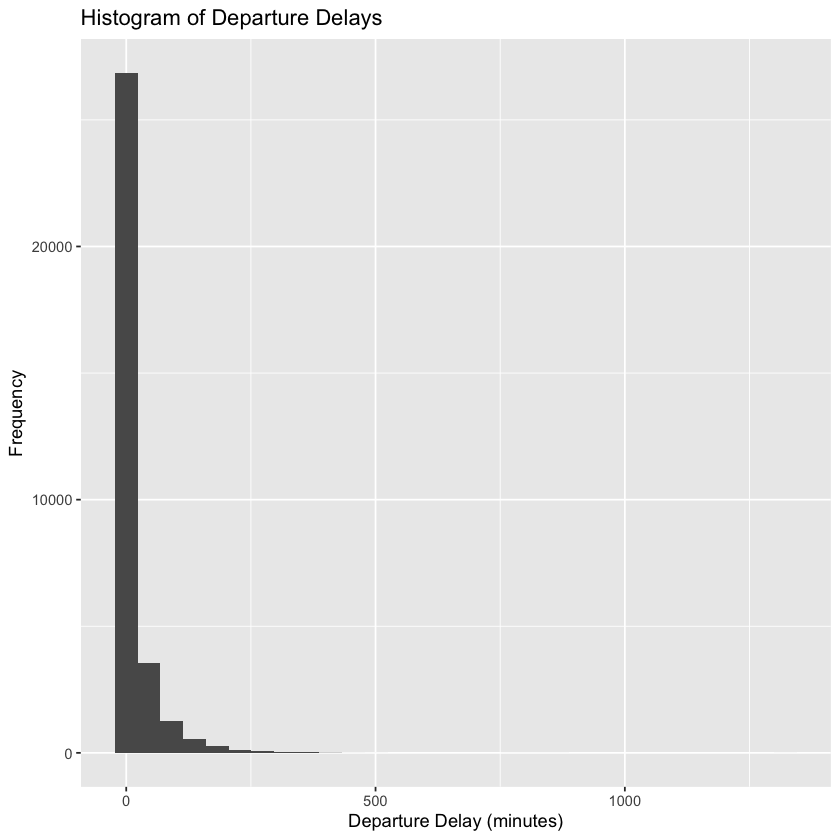

In [170]:
# Create a histogram of departure delays ('dep_delay').
# A histogram helps us understand the distribution of a numerical variable.
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram() +
  labs(title = "Histogram of Departure Delays", x = "Departure Delay (minutes)", y = "Frequency")

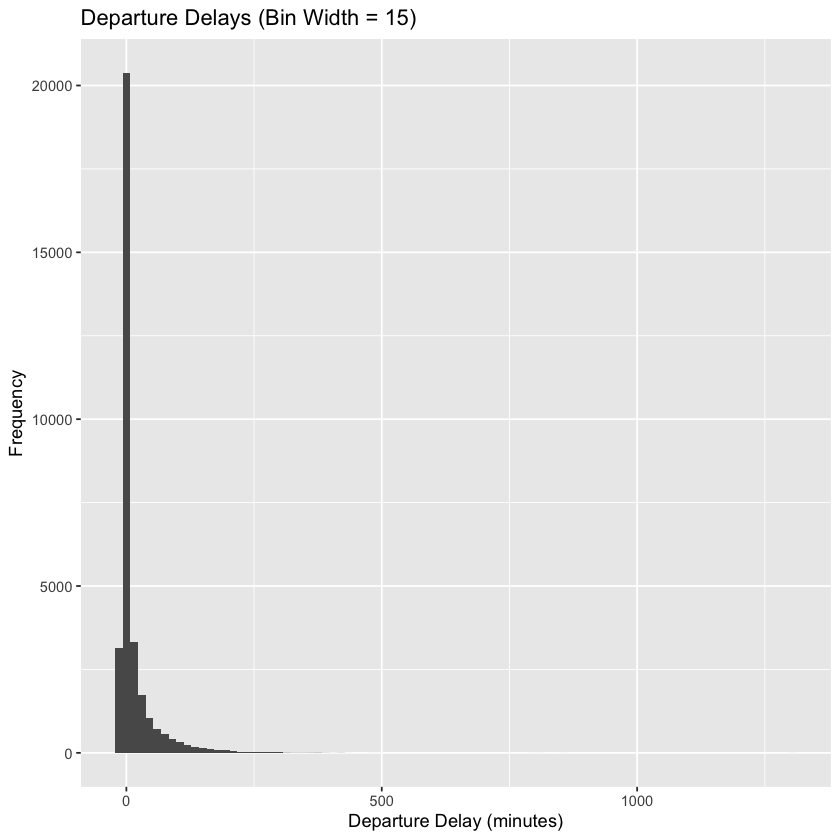

In [57]:
# Experiment with different bin widths to see how the histogram changes.
# Smaller bin widths show more detail, while larger bin widths provide a broader overview.

# Histogram with a bin width of 15 minutes.
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 15) +
  labs(title = "Departure Delays (Bin Width = 15)", x = "Departure Delay (minutes)", y = "Frequency")



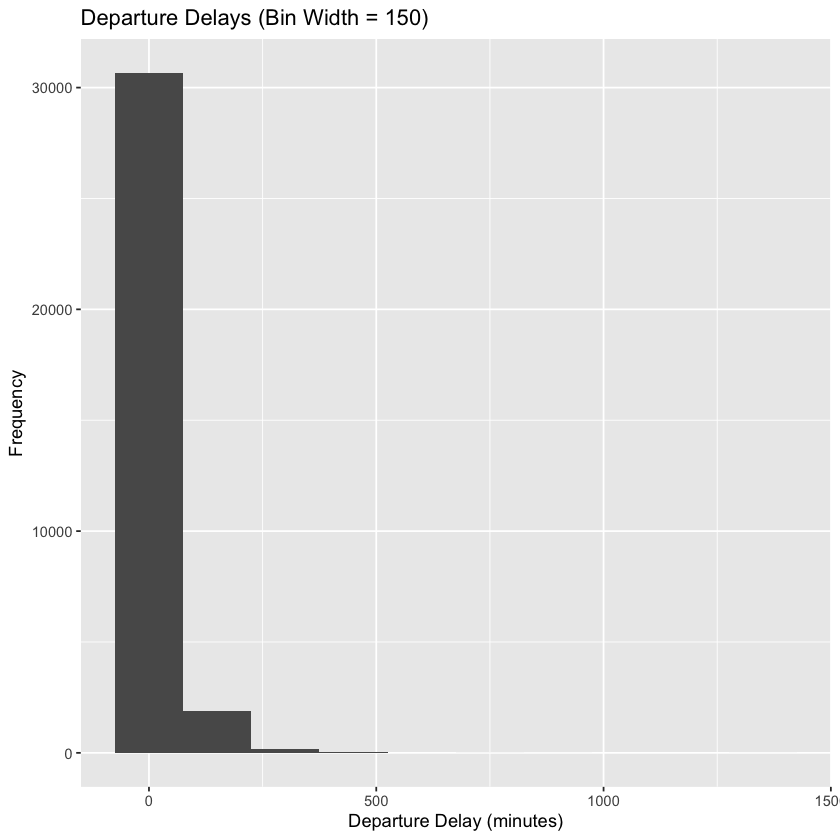

In [104]:
# Histogram with a bin width of 150 minutes.
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 150) +
  labs(title = "Departure Delays (Bin Width = 150)", x = "Departure Delay (minutes)", y = "Frequency")

# STEP 5: FILTER DATA FOR SPECIFIC FLIGHTS

In [172]:
# Filter the dataset to include only flights headed to Los Angeles ('LAX').
# The 'filter()' function keeps rows where the condition is TRUE.
lax_flights <- nycflights %>%
  filter(dest == "LAX")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


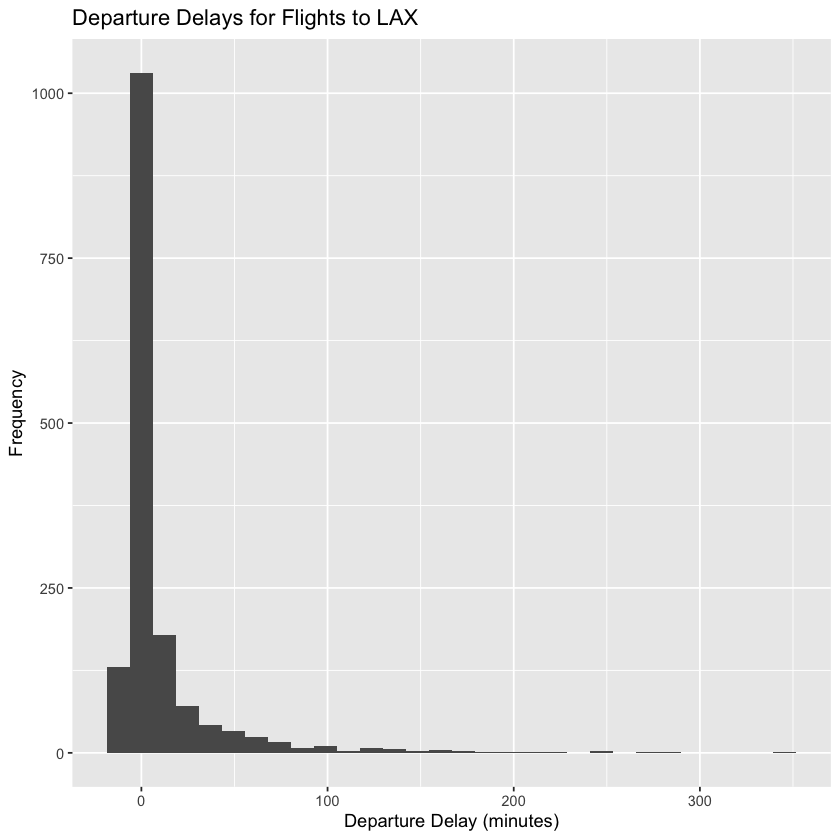

In [176]:
# Create a histogram of departure delays for flights to LAX.
# This helps us understand the distribution of delays for this specific destination.
ggplot(data = lax_flights, aes(x = dep_delay)) +
  geom_histogram() +
  labs(title = "Departure Delays for Flights to LAX", x = "Departure Delay (minutes)", y = "Frequency")

# STEP 6: CALCULATE SUMMARY STATISTICS


In [180]:
# Calculate summary statistics for flights to LAX.
# 'summarize()' creates a summary table with specified statistics.

lax_summary_stats <- lax_flights %>%
  summarize(
    mean_departure_delay = mean(dep_delay, na.rm = TRUE),   # Mean departure delay
    median_departure_delay = median(dep_delay, na.rm = TRUE), # Median departure delay
    total_flights = n()  # Number of flights
  )

# Print the summary statistics.
print(lax_summary_stats)

# A tibble: 1 × 3
  mean_departure_delay median_departure_delay total_flights
                 <dbl>                  <dbl>         <int>
1                 9.78                     -1          1583


# STEP 7: FILTER BASED ON MULTIPLE CRITERIA

In [184]:
# Filter the dataset to include only flights headed to San Francisco ('SFO') in February.
# Multiple conditions are separated by commas (equivalent to AND logic).
sfo_feb_flights <- nycflights %>%
  filter(dest == "SFO", month == 2)

# Calculate summary statistics grouped by origin airport.
# 'group_by()' groups the data by a variable, and 'summarize()' calculates statistics for each group.
sfo_feb_summary <- sfo_feb_flights %>%
  group_by(origin) %>%
  summarize(
    median_departure_delay = median(dep_delay, na.rm = TRUE), # Median departure delay
    interquartile_range_delay = IQR(dep_delay, na.rm = TRUE),  # Interquartile range of departure delays;›
    total_flights = n()  # Number of flights
  )

# Print the grouped summary statistics.
print(sfo_feb_summary)



# A tibble: 2 × 4
  origin median_departure_delay interquartile_range_delay total_flights
  <chr>                   <dbl>                     <dbl>         <int>
1 EWR                       0.5                      5.75             8
2 JFK                      -2.5                     15.2             60


# STEP 8: ANALYZE DEPARTURE DELAYS BY MONTH

In [73]:
# Calculate the average departure delay for each month.
# 'group_by()' groups the data by month, and 'summarize()' calculates the mean delay.
# 'arrange(desc(mean_departure_delay))' sorts the results in descending order of mean delay.
monthly_delay_summary <- nycflights %>%
  group_by(month) %>%
  summarize(mean_departure_delay = mean(dep_delay, na.rm = TRUE)) %>%
  arrange(desc(mean_departure_delay))

# Print the monthly delay summary.
print(monthly_delay_summary)

# A tibble: 12 × 2
   month mean_departure_delay
   <int>                <dbl>
 1     7                20.8 
 2     6                20.4 
 3    12                17.4 
 4     4                14.6 
 5     3                13.5 
 6     5                13.3 
 7     8                12.6 
 8     2                10.7 
 9     1                10.2 
10     9                 6.87
11    11                 6.10
12    10                 5.88


# STEP 9: CLASSIFY FLIGHTS AS "ON TIME" OR "DELAYED"

In [186]:
# Create a new variable 'departure_status' to classify flights as "on time" or "delayed".
# 'mutate()' adds a new column to the dataset.
# 'ifelse()' checks if 'dep_delay' is less than 5 minutes and assigns "on time" or "delayed".
nycflights <- nycflights %>%
  mutate(departure_status = ifelse(dep_delay < 5, "on time", "delayed"))

# View the first few rows of the updated dataset to confirm the new column.
head(nycflights)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,departure_status
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,delayed
2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,on time
2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,on time
2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,on time
2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,on time
2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17,on time


# STEP 10: CALCULATE ON-TIME DEPARTURE RATES BY AIRPORT

In [190]:
# Calculate the on-time departure rate for each origin airport.
# 'group_by()' groups the data by airport, and 'summarise()' calculates the rate.
# 'sum(departure_status == "on time") / n()' calculates the proportion of on-time flights.
on_time_summary <- nycflights %>%
  group_by(origin) %>%
  summarize(on_time_departure_rate = sum(departure_status == "on time") / n()) %>%
  arrange(desc(on_time_departure_rate))

# Print the on-time departure rate summary.
print(on_time_summary)

# A tibble: 3 × 2
  origin on_time_departure_rate
  <chr>                   <dbl>
1 LGA                     0.728
2 JFK                     0.694
3 EWR                     0.637


# STEP 11: VISUALIZE ON-TIME DEPARTURE RATES

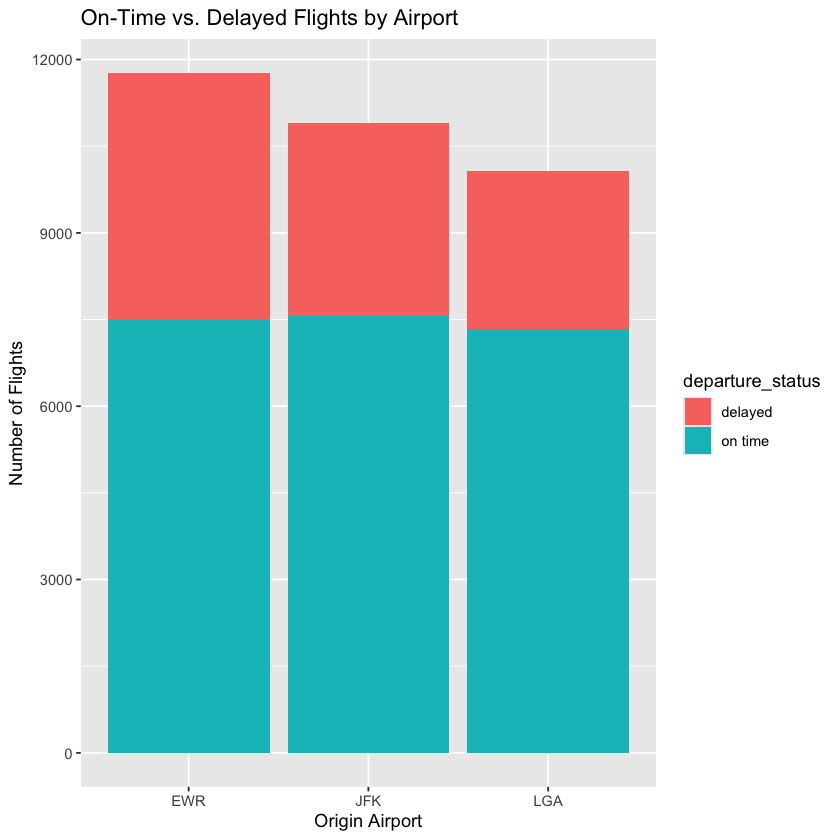

In [192]:
# Create a bar plot to visualize the distribution of on-time vs. delayed flights by airport.
# 'fill = departure_status' colors the bars based on the 'departure_status' variable.
ggplot(data = nycflights, aes(x = origin, fill = departure_status)) +
  geom_bar() +
  labs(title = "On-Time vs. Delayed Flights by Airport", x = "Origin Airport", y = "Number of Flights")

# STEP 12: CALCULATE AVERAGE SPEED


In [194]:
# Add a new variable 'average_speed' to calculate the average speed of each flight in mph.
# 'distance' is in miles, and 'air_time' is in minutes, so we divide by 60 to convert to hours.
nycflights <- nycflights %>%
  mutate(average_speed = distance / (air_time / 60))

# View the first few rows of the updated dataset to confirm the new column.
head(nycflights)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,departure_status,average_speed
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,delayed,474.4409
2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,on time,443.8889
2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,on time,394.9468
2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,on time,446.6667
2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,on time,355.2000
2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17,on time,318.6957


# STEP 13: CREATE A SCATTERPLOT OF AVERAGE SPEED VS. DISTANCE

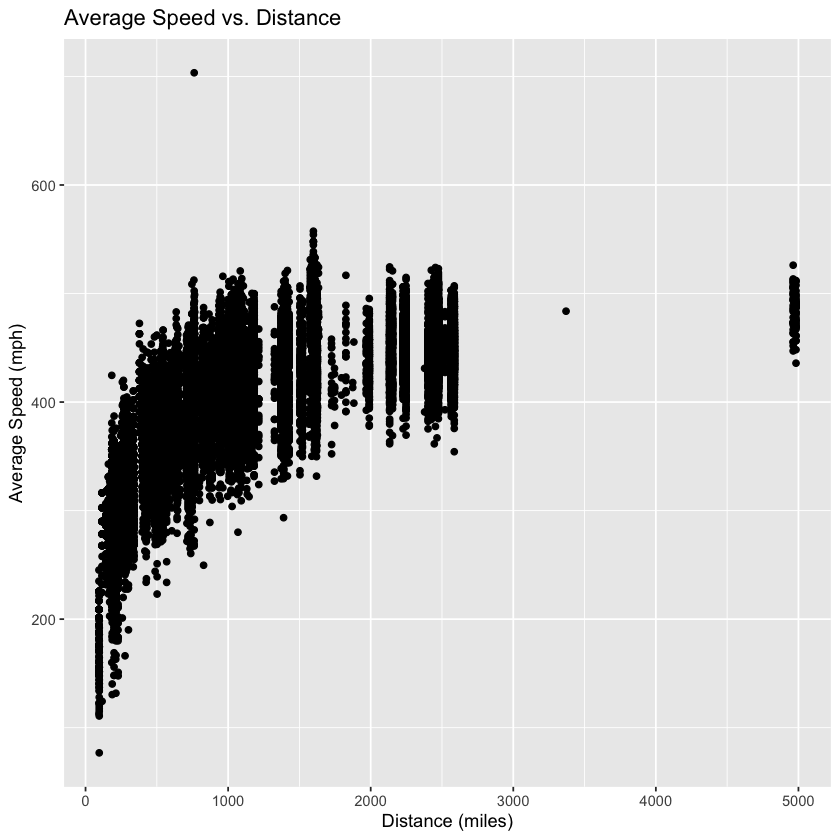

In [83]:
# Create a scatterplot to explore the relationship between average speed and distance.
# 'geom_point()' creates a scatterplot.
ggplot(data = nycflights, aes(x = distance, y = average_speed)) +
  geom_point() +
  labs(title = "Average Speed vs. Distance", x = "Distance (miles)", y = "Average Speed (mph)")

# STEP 14: FILTER DATA FOR SPECIFIC CARRIERS AND CREATE A SCATTERPLOT


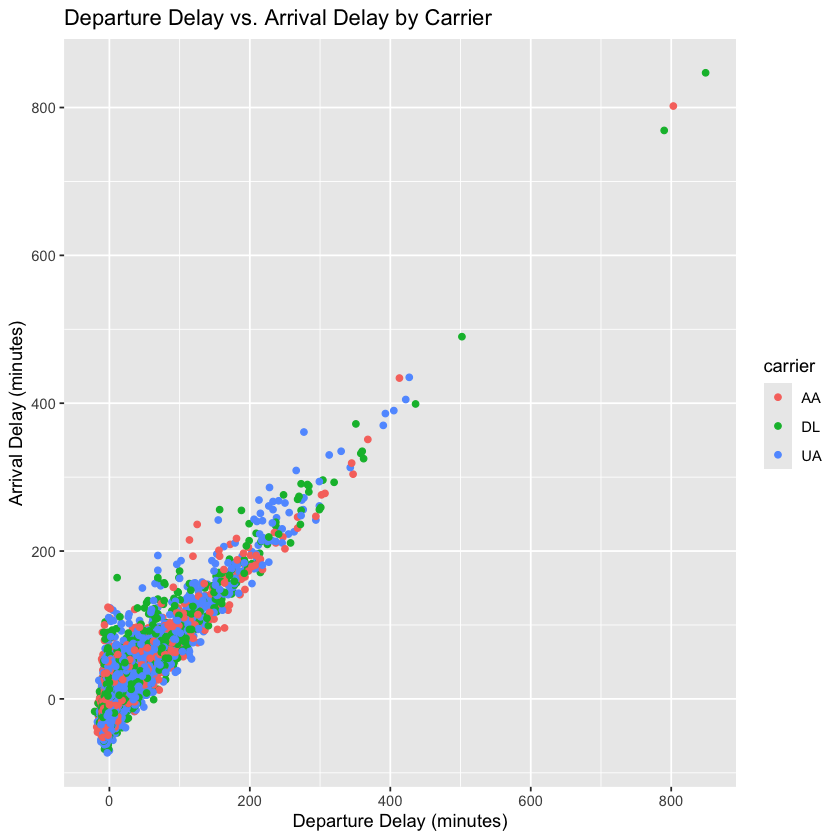

In [85]:
# Filter the dataset to include only flights operated by American Airlines ('AA'),
# Delta Airlines ('DL'), and United Airlines ('UA').
filtered_flights <- nycflights %>%
  filter(carrier %in% c("AA", "DL", "UA"))

# Create a scatterplot of departure delay vs. arrival delay, colored by carrier.
# 'color = carrier' assigns different colors to points based on the carrier.
ggplot(data = filtered_flights, aes(x = dep_delay, y = arr_delay, color = carrier)) +
  geom_point() +
  labs(title = "Departure Delay vs. Arrival Delay by Carrier", x = "Departure Delay (minutes)", y = "Arrival Delay (minutes)")

In [ ]:
# END OF LAB 